# Assignment 11b, GR10NR11

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import *
from IPython.display import clear_output
import pandas as pd
import random as rd
import scipy

newparams = {'figure.figsize': (15, 9), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)

In [30]:
#constants for c-curve
Teq = 500+273 #Kelvin
A_0 = 420 #J/mol
Qd = 130000 #J/mol
Tr = 300+273 #Kelvin
tr = 10 #s
n = 0.75
Xc = 0.05
R = 8.314 #J/Kmol

T1 = np.linspace(270+273, 500+273, 1000)

In [31]:
def t_star(T):
    ts = tr*np.exp((A_0/R)*(((Teq**2)/(T*(Teq-T)**2))-(Teq**2/(Tr*(Teq-Tr)**2)))+(Qd/R)*((1/T)-(1/Tr)))
    return ts


def t(frac):
    t = np.zeros(len(T1))
    for i in range(len(T1)):
        ts = t_star(T1[i])
        t[i] = ts*(np.log(1-frac)/np.log(1-Xc))**(1/n)
    return t

In [32]:
#constants
Ti = 550+273 #Celcius
T0 = 20+273 #Celcius
a = 62 #mm2/s

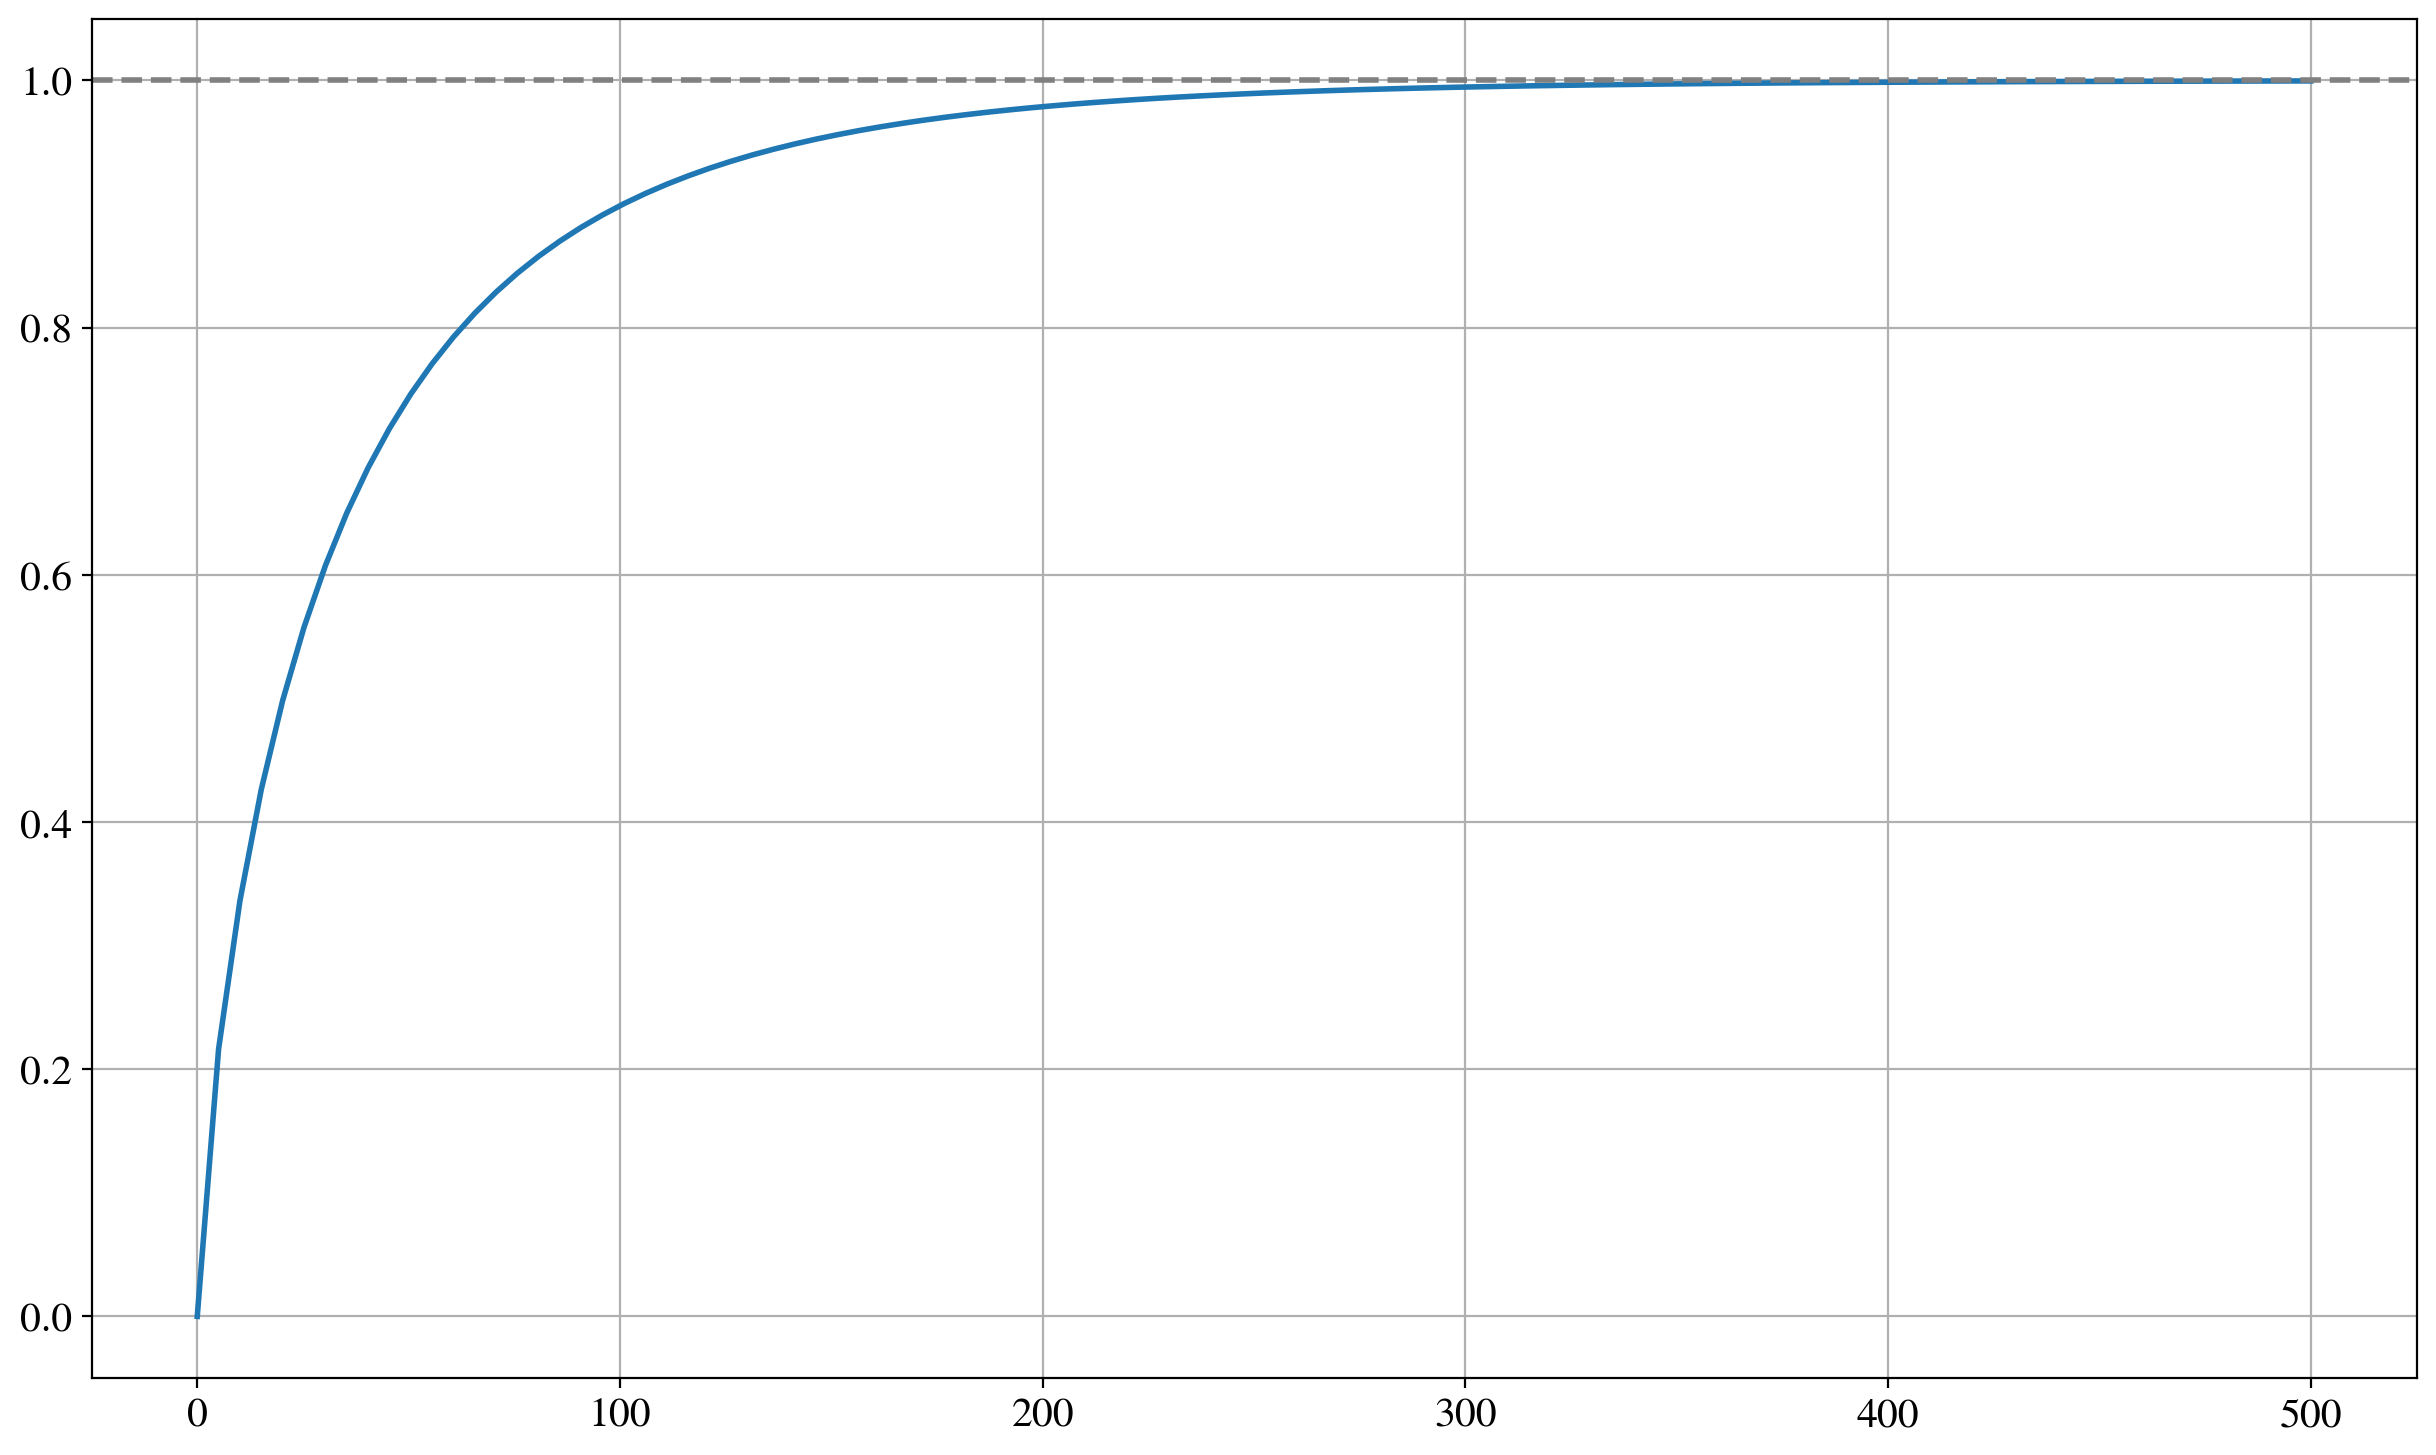

In [99]:
x = np.linspace(0, 500, 100)
tj = np.logspace(-2, 6, 100)
    
def jominy(pos):
    T = np.zeros(len(tj))
    for i in range(len(T)):
        T2 = T0 + (Ti-T0)*scipy.special.erf(pos/(2*np.sqrt(a*tj[i])))
        if T2 > 308:
            T[i] = T2
    return np.trim_zeros(T)


def jfrac():
    X = np.zeros(len(x))
    for i in range(len(x)):
        T = jominy(x[i])
        I = 0
        dt = x[i] #(tj[i]-tj[i-1])
        for T1 in T:
            if T1 < (Teq-10):
                ts = t_star(T1)
                I += dt/ts
        X[i] = 1-(1-Xc)**(I**n)
    return X


def jfracplot():
    X = jfrac()
    plt.plot(x, X)
    plt.axhline(y=1, linestyle='--', color='grey')
    plt.grid()
    plt.show()
    
jfracplot()

In [34]:
#constants
rhoc = 0.0027*10**(9) #J/m3C
w = 10*10**(-3) #m
#h = np.array([10, 100, 10000])

harray = np.logspace(1, 4, 100)


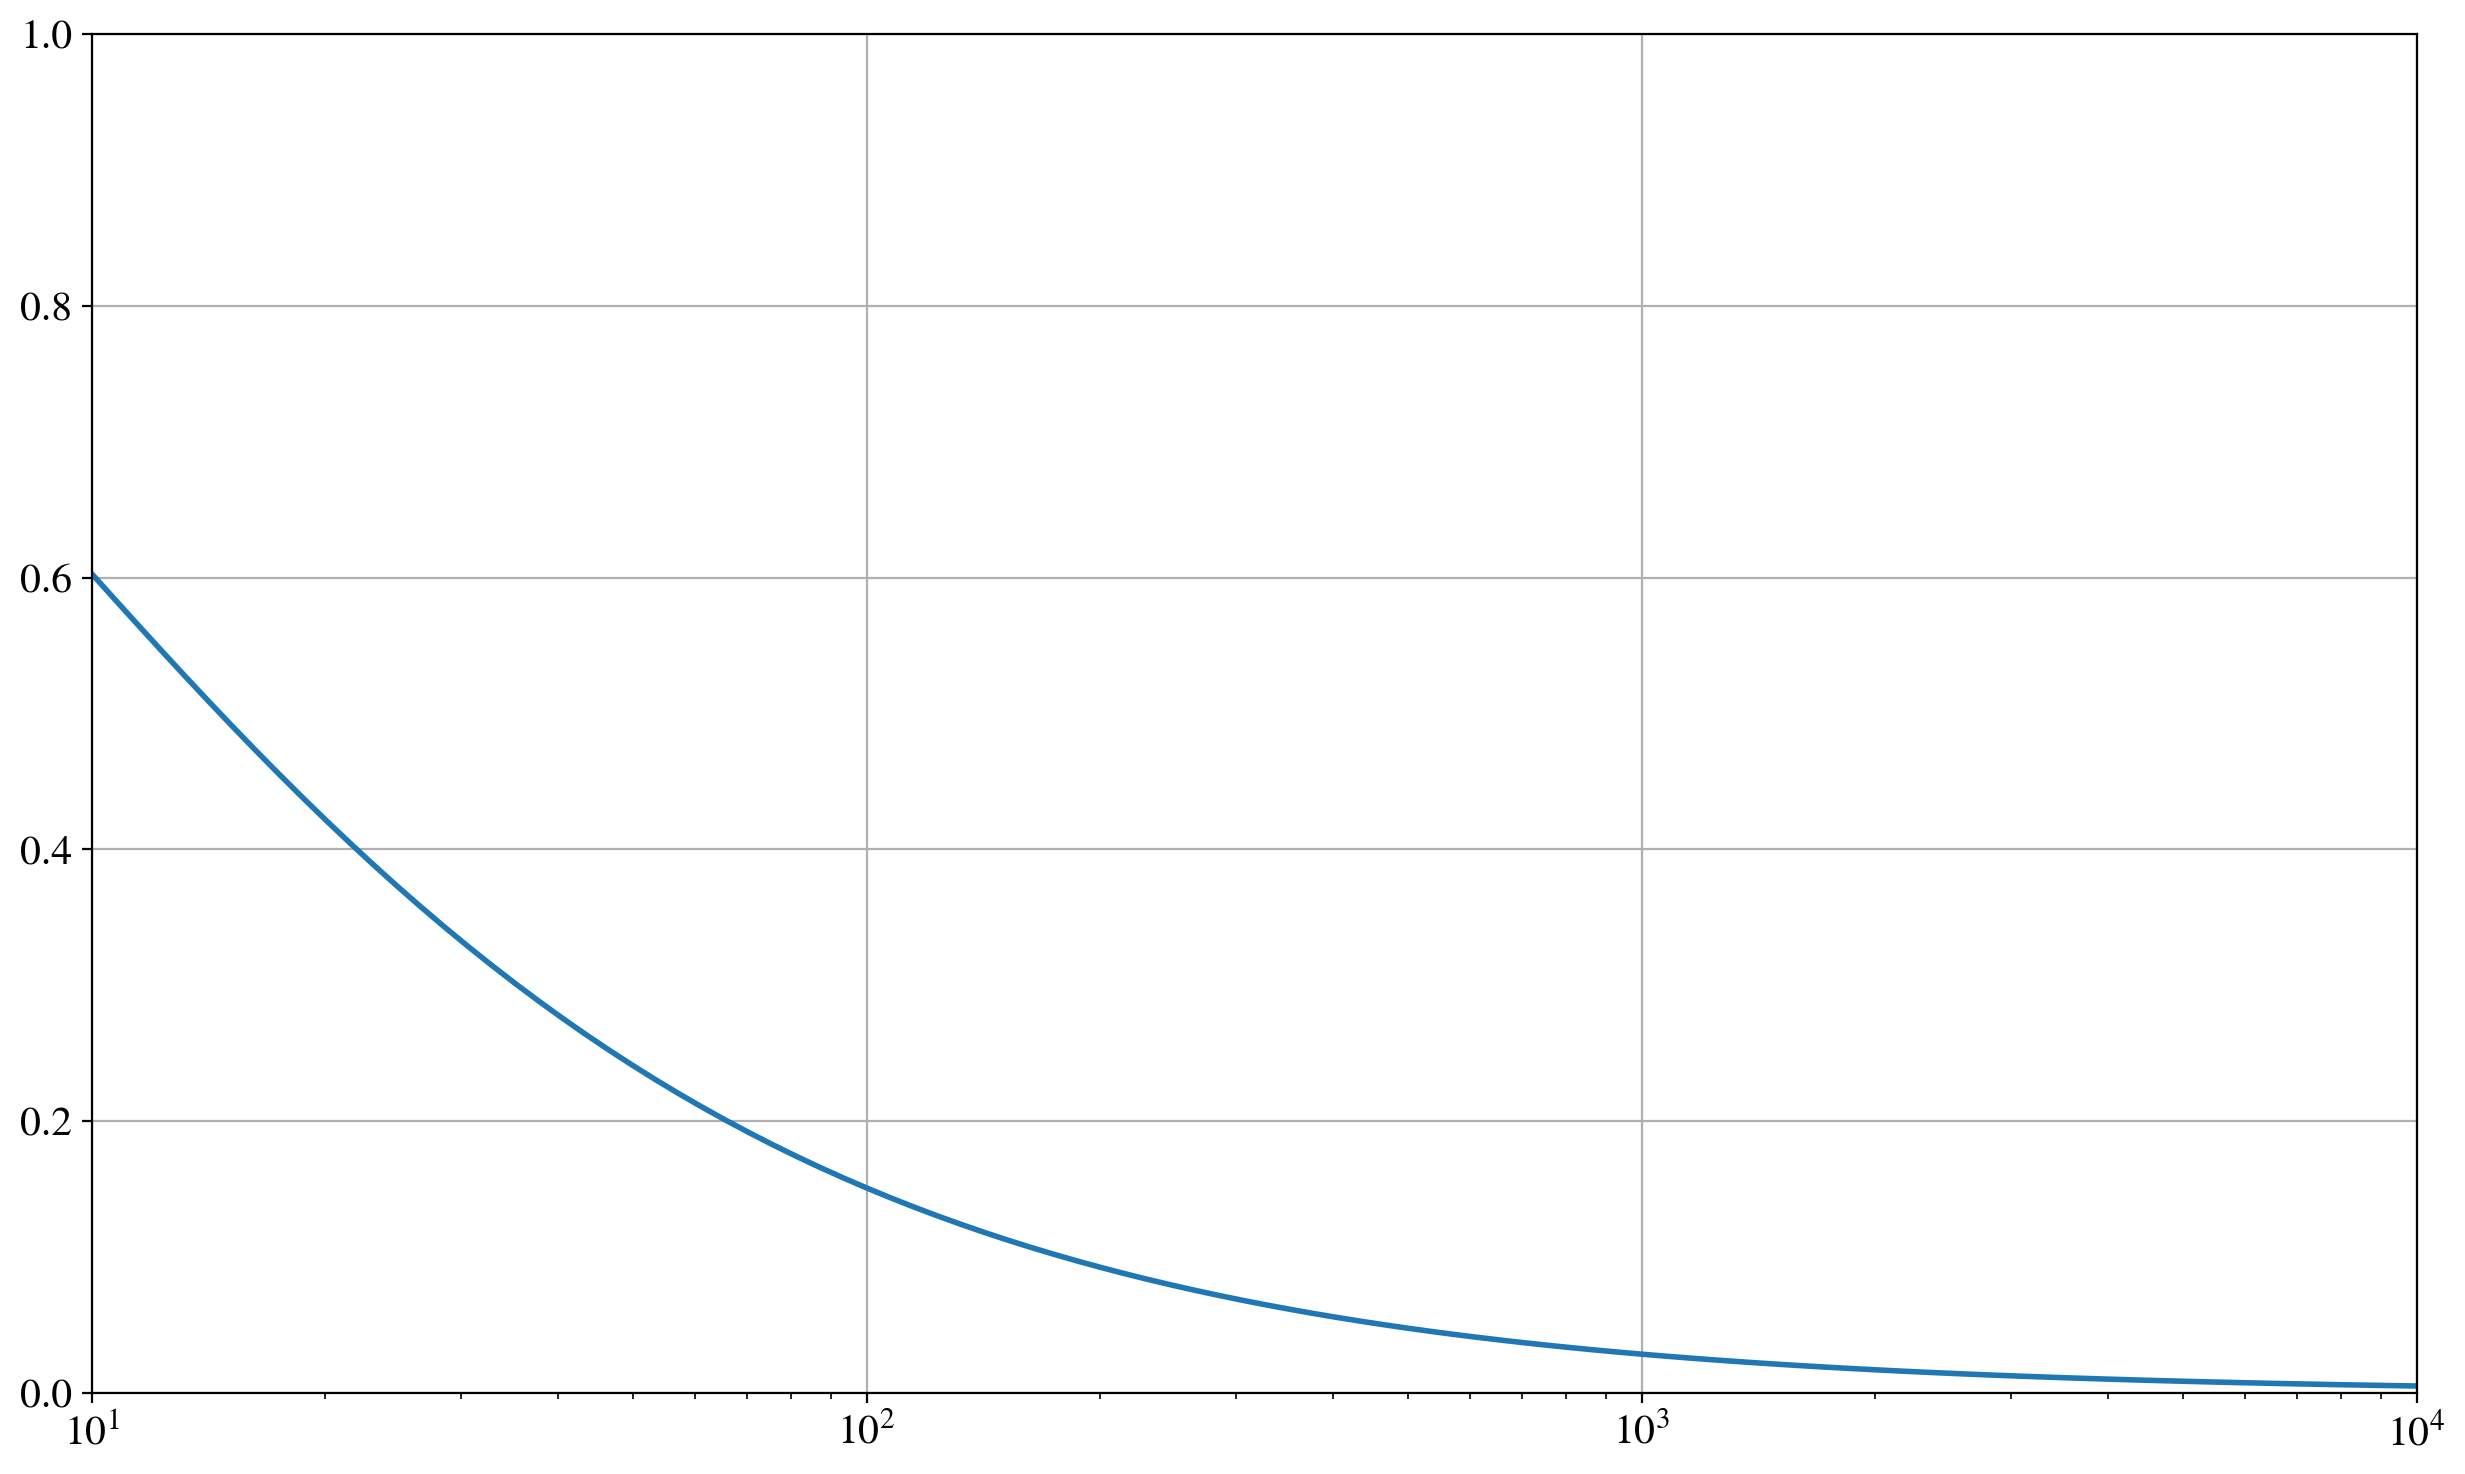

In [44]:
def extrusion(h):
    T = np.zeros(len(tj))
    for i in range(len(tj)):
        T2 = T0 + (Ti-T0)*np.exp((-(2*h)/(w*rhoc))*tj[i])
        if T2 > 308:
            T[i] = T2
    return np.trim_zeros(T)

def efrac():
    X = np.zeros(len(harray))
    for i in range(len(harray)):
        T = extrusion(harray[i])
        I = 0
        dt = 350/harray[i] #tj[i]-tj[i-1]
        for T1 in T:
            ts = t_star(T1)
            I += dt/ts
        X[i] = 1-(1-Xc)**(I**n)
    return X

def efracplot():
    X = efrac()
    plt.plot(harray, X)
    plt.xscale('log')
    plt.ylim(0, 1)
    plt.xlim(10, 10000)
    plt.grid()
    plt.show()
    
efracplot()

In [79]:
#constants
q0vd = np.array([0.05*10**9, 0.1*10**9, 0.2*10**9])
a2 = 62*10**(-6)

q0vdarray = np.logspace(7, 9, 100)

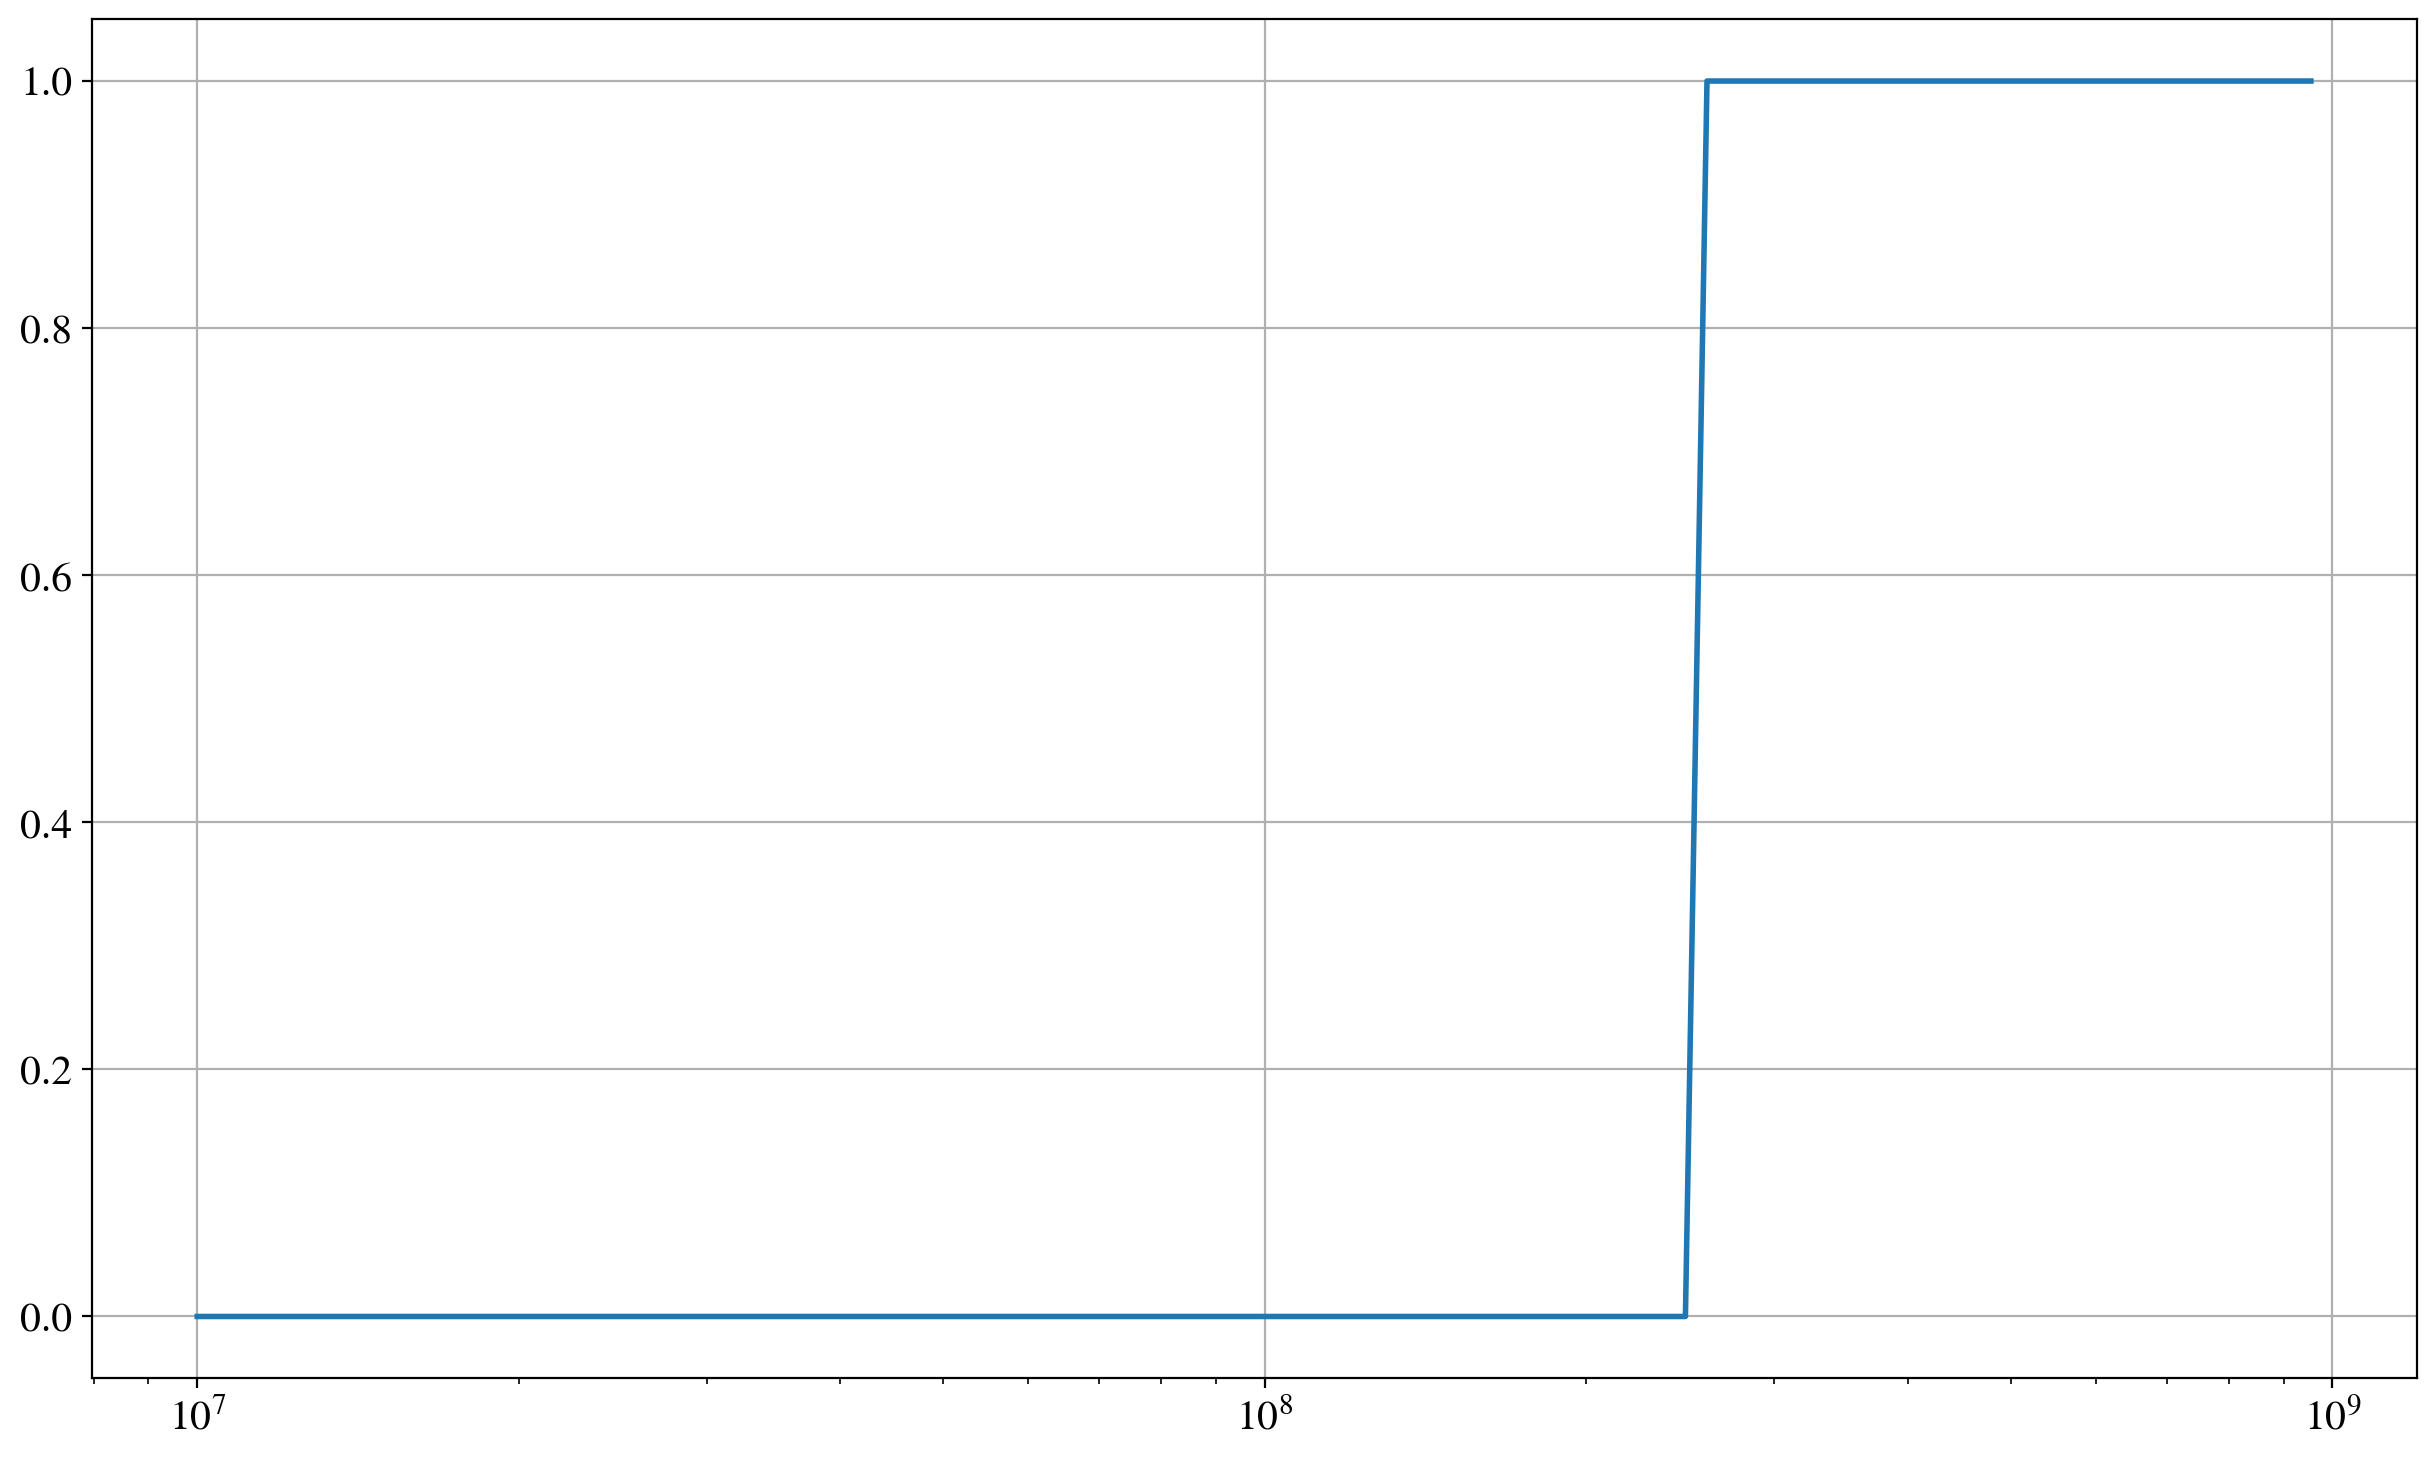

In [80]:
tw = np.logspace(-4, 4, 500)

def welding(q0vd1, y):
    T = np.zeros(len(tw))
    for i in range(len(tw)):
        dTdt = -(q0vd1*(2*a2*tw[i]-y**2)*np.exp(-y**2/(4*a2*tw[i])))/(8*np.sqrt(np.pi)*rhoc*tw[i]*(a2*tw[i])**(3/2))
        T2 = T0 + (q0vd1/(rhoc*np.sqrt(4*np.pi*a2*tw[i])))*np.exp(-y**2/(4*a2*tw[i]))
        if T2 > 308 or dTdt > 0:
            T[i] = T2
    return np.trim_zeros(T)

def wfrac(y):
    X = np.zeros(len(q0vdarray))
    for i in range(len(q0vdarray)):
        T = welding(q0vdarray[i], y)
        I = 0
        if np.max(T)>Teq:
            for T1 in T:
                if T1<Teq:
                    dt = tj[i]-tj[i-1]
                    ts = t_star(T1)
                    I += dt/ts
        X[i] = 1-(1-Xc)**(I**n)
    return X[:-1]

def wfracplot(y):
    X = wfrac(y)
    plt.plot(q0vdarray[:-1], X)
    plt.xscale('log')
    plt.grid()
    plt.show()
    
wfracplot(0.048)